决策树（Decision Tree）

在本章中，我们将向您展示如何制作“决策树”。决策树是一种流程图，可以帮助您根据以前的经验进行决策。

在这个例子中，一个人将尝试决定他/她是否应该参加喜剧节目。

幸运的是，我们的例中人物每次在镇上举办喜剧节目时都进行注册，并注册一些关于喜剧演员的信息，并且还登记了他/她是否去过。

In [1]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


如需制作决策树，所有数据都必须是数字。

我们必须将非数字列 “Nationality” 和 “Go” 转换为数值。

Pandas 有一个 map() 方法，该方法接受字典，其中包含有关如何转换值的信息。

{'UK': 0, 'USA': 1, 'N': 2}

表示将值 'UK' 转换为 0，将 'USA' 转换为 1，将 'N' 转换为 2。

In [2]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


然后，我们必须将特征列与目标列分开。

特征列是我们尝试从中预测的列，目标列是具有我们尝试预测的值的列。

In [3]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

# X 是特征列，y 是目标列：
print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


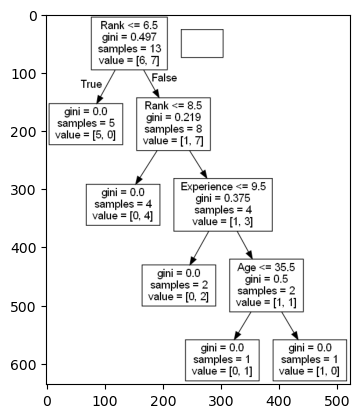

In [4]:
# 创建一个决策树，将其另存为图像，然后显示该图像：
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

# Rank
Rank <= 6.5 表示排名在 6.5 以下的喜剧演员将遵循 True 箭头（向左），其余的则遵循 False 箭头（向右）。

gini = 0.497 表示分割的质量，并且始终是 0.0 到 0.5 之间的数字，其中 0.0 表示所有样本均得到相同的结果，而 0.5 表示分割完全在中间进行。

samples = 13 表示在决策的这一点上还剩下 13 位喜剧演员，因为这是第一步，所以他们全部都是喜剧演员。

value = [6, 7] 表示在这 13 位喜剧演员中，有 6 位将获得 "NO"，而 7 位将获得 "GO"。

# Gini
分割样本的方法有很多，我们在本教程中使用 GINI 方法。

基尼方法使用以下公式：

Gini = 1 - (x/n)2 - (y/n)2

其中，x 是肯定答案的数量 ("GO")，n 是样本数量，y 是否定答案的数量 ("NO")，使用以下公式进行计算：

1 - (7 / 13)2 - (6 / 13)2 = 0.497

下一步包含两个框，其中一个框用于喜剧演员，其 'Rank' 为 6.5 或更低，其余为一个框。

# True - 5 名喜剧演员在这里结束：
gini = 0.0 表示所有样本均得到相同的结果。

samples = 5 表示该分支中还剩下 5 位喜剧演员（5 位的等级为 6.5 或更低的喜剧演员）。

value = [5, 0] 表示 5 得到 "NO" 而 0 得到 "GO"。

# False - 8 位戏剧演员继续：

# Nationality（国籍）
Nationality <= 0.5 表示国籍值小于 0.5 的喜剧演员将遵循左箭头（这表示来自英国的所有人），其余的将遵循右箭头。

gini = 0.219 意味着大约 22％ 的样本将朝一个方向移动。

samples = 8 表示该分支中还剩下 8 个喜剧演员（8 个喜剧演员的等级高于 6.5）。

value = [1, 7] 表示在这 8 位喜剧演员中，1 位将获得 "NO"，而 7 位将获得 "GO"。

# True - 4 名戏剧演员继续：
# Age（年龄）
Age <= 35.5 表示年龄在 35.5 岁或以下的喜剧演员将遵循左箭头，其余的将遵循右箭头。

gini = 0.375 意味着大约 37.5％ 的样本将朝一个方向移动。

samples = 4 表示该分支中还剩下 4 位喜剧演员（来自英国的 4 位喜剧演员）。

value = [1, 3] 表示在这 4 位喜剧演员中，1 位将获得 "NO"，而 3 位将获得 "GO"。

# False - 4 名喜剧演员到这里结束：
gini = 0.0 表示所有样本都得到相同的结果。

samples = 4 表示该分支中还剩下 4 位喜剧演员（来自英国的 4 位喜剧演员）。

value = [0, 4] 表示在这 4 位喜剧演员中，0 将获得 "NO"，而 4 将获得 "GO"。


# True - 2 名喜剧演员在这里结束：
gini = 0.0 表示所有样本都得到相同的结果。

samples = 2 表示该分支中还剩下 2 名喜剧演员（2 名 35.5 岁或更年轻的喜剧演员）。

value = [0, 2] 表示在这 2 位喜剧演员中，0 将获得 "NO"，而 2 将获得 "GO"。

# False - 2 名戏剧演员继续：
# Experience（经验）
Experience <= 9.5 表示具有 9.5 年或以上经验的喜剧演员将遵循左侧的箭头，其余的将遵循右侧的箭头。

gini = 0.5 表示 50％ 的样本将朝一个方向移动。

samples = 2 表示此分支中还剩下 2 个喜剧演员（2 个年龄超过 35.5 的喜剧演员）。

value = [1, 1] 表示这两个喜剧演员中，1 将获得 "NO"，而 1 将获得 "GO"。

# True - 1 名喜剧演员在这里结束：
gini = 0.0 表示所有样本都得到相同的结果。

samples = 1 表示此分支中还剩下 1 名喜剧演员（1 名具有 9.5 年或以下经验的喜剧演员）。

value = [0, 1] 表示 0 表示 "NO"，1 表示 "GO"。

# False - 1 名喜剧演员到这里为止：
gini = 0.0 表示所有样本都得到相同的结果。

samples = 1 表示此分支中还剩下 1 位喜剧演员（其中 1 位具有超过 9.5 年经验的喜剧演员）。

value = [1, 0] 表示 1 表示 "NO"，0 表示 "GO"。